In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../../modules')
from algo.on_policy_prediction_with_approximation import PolynomialFeatureContructor

In [4]:
xs = np.linspace(0, 10, 100)
ys = np.linspace(0, 10, 100)
xxs, yys = np.meshgrid(xs, ys)
xxs, yys = xxs.ravel(), yys.ravel()
states = np.vstack([xxs, yys]).T
states.shape

(10000, 2)

In [31]:
order = 4

In [39]:
poly = PolynomialFeatureContructor(num_raw_features=2, order=order, lowers=(-1, -1), uppers=(1, 1))

In [40]:
feature_vectors = []
for state in states:
    feature_vectors.append(poly.preprocess(state))
feature_vectors = np.array(feature_vectors).squeeze()

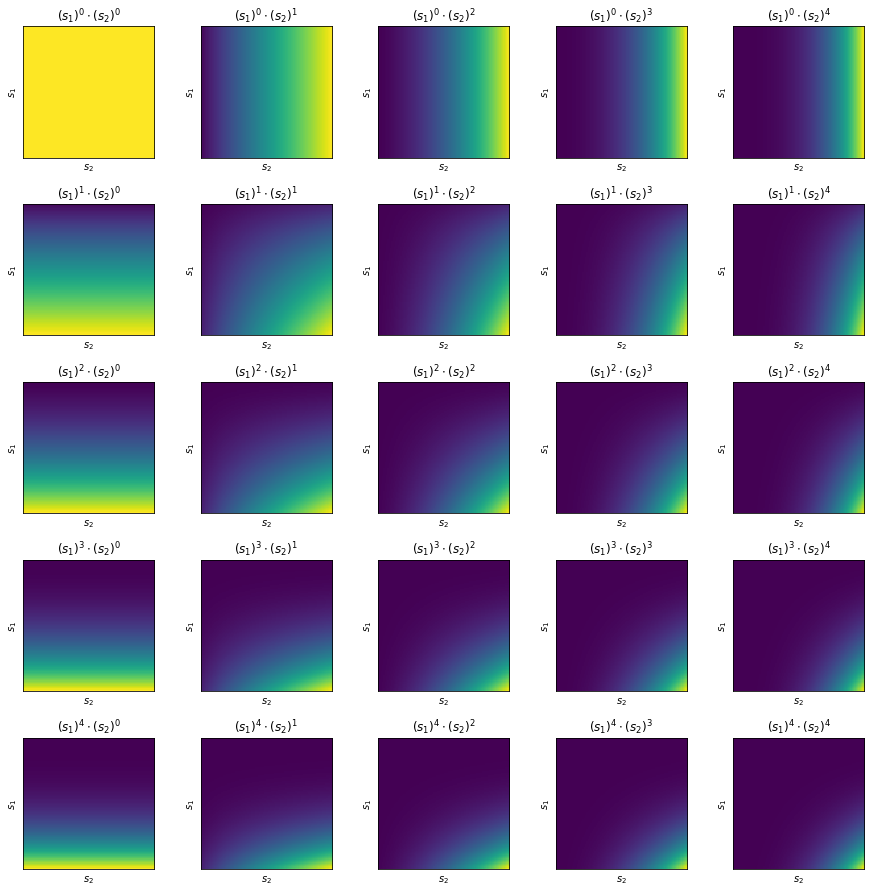

In [45]:
ncols = order + 1
nrows = order + 1
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 2.5, nrows * 2.5))
for i, ax in enumerate(axs.T.ravel()):  # since the loop 2 cells above first goes over all xs (cols)
    min, max = feature_vectors[:,i].min(), feature_vectors[:,i].max()
    ax.matshow(feature_vectors[:,i].reshape(100, 100), origin='upper', cmap='viridis', vmin=min-0.1, vmax=max)
    ax.set_title(fr'$(s_1)^{poly.c[i][1]} \cdot (s_2)^{poly.c[i][0]}$')
    ax.set_xlabel(r'$s_2$'); ax.set_ylabel(r'$s_1$')
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.savefig('polynomial_features.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)